## Stack images examples

Below are examples of how to load and display images from a stack

In [1]:
from mmMap import mmMap

# load a map
filePath = '/Users/cudmore/Desktop/data/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

  buildRunMap: 287 1512


map rr30a loaded in 0.4 seconds.


mmStack.loadStack() loaded map session 0 channel 2 in 0.15 seconds.


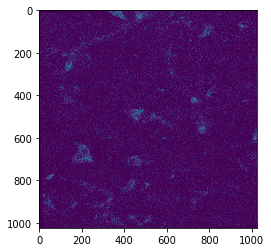

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# loading a map only loads the .txt database of (map, stackdb, line)
# we need to explicitly load the images for a stack

stackIdx = 0
images = m.stacks[stackIdx].loadStack(channel=2)

firstImage = images[0,:,:] 3 image slices are in the first dimension

# plot with matplotlib
imgplot = plt.imshow(firstImage)
plt.show()

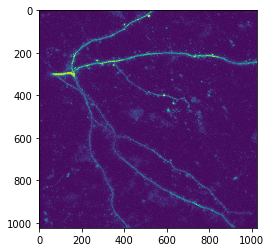

In [7]:
# but the first image is often boring, lets take a max project of all images (slices) in the stack
maxProject = np.amax(images, axis=0)

# plot with matplotlib
imgplot = plt.imshow(maxProject)
plt.show()

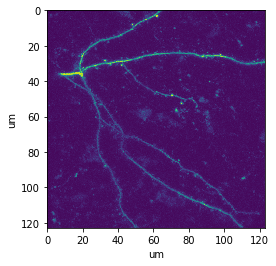

In [10]:
# but this is in pixels, we want um

# the stack has its voxel size, units are 'um per pixel'
voxelx = m.stacks[stackIdx].voxelx
voxely = m.stacks[stackIdx].voxely

# set up the scale of the image in um
iLeft = 0
iTop = 0
iRight = iBottom = voxelx * images.shape[1] #this only handles square images

# plot with matplotlib
plt.imshow(maxProject, extent=[iLeft, iRight, iBottom, iTop]) #l, r, b, t
plt.xlabel('um')
plt.ylabel('um')
plt.show()

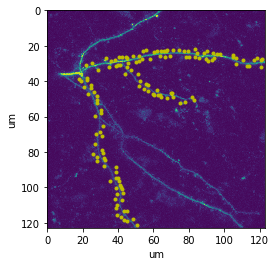

In [13]:
# now put the spines on top of this maximum projection

x = m.stacks[stackIdx].getValues('x') # units are um
y = m.stacks[stackIdx].getValues('y')

# plot with matplotlib
plt.plot(x, y, 'y.') # plot spines
plt.imshow(maxProject, extent=[iLeft, iRight, iBottom, iTop]) # plot max project with um scale
plt.xlabel('um')
plt.ylabel('um')

plt.show()